In [4]:
from __future__ import division
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
%matplotlib inline  

In [5]:
def Gillespie_SIR(N1,N2,beta1,beta2,gamma,tr12,tr21,tmax):
    print "Ro of city 1", beta1/gamma
    print "Ro of city 2", beta2/gamma
    MAX = int(1e6) #Maximum size to store the data
    TVals   = np.zeros(MAX,dtype=float) #arrays of the max size to store values 
    S1Vals   = np.zeros(MAX,dtype=int)
    I1Vals   = np.zeros(MAX,dtype=int)
    S2Vals   = np.zeros(MAX,dtype=int)
    I2Vals   = np.zeros(MAX,dtype=int)
    R1Vals   = np.zeros(MAX,dtype=int)
    R2Vals   = np.zeros(MAX,dtype=int)
    
    I1 = int(np.ceil(0.01*N1)) # Percentage of person infected from the total population
    I2=0
    S1 = N1-I1
    S2 = N2-I2
    R1 = 0
    R2 = 0
    t = 0.0
    count = 0
    I1Vals[count] = I1
    S1Vals[count] = S1
    I2Vals[count] = I2
    S2Vals[count] = S2
    R1Vals[count] = R1
    R2Vals[count] = R2
    
    TVals[count] = t
     
    while t < tmax and I1 >= 0 and I2>=0 and count < MAX:
        Rate_S12I1 = beta1*S1*(I1+tr21*I2) 
        Rate_I12R1 = gamma*(I1+tr21*I2) 
        Rate_S22I2 = beta2*S2*(I2+tr12*I1) 
        Rate_I22R2 = gamma*(I1+tr12*I1)
        Rate_S22S1 = tr21*S2
        Rate_I22I1 = tr21*I2
        Rate_R22R1 = tr21*R2
        Rate_S12S2 = tr12*S1
        Rate_I12I2 = tr12*I1
        Rate_R12R2 = tr12*R1
        
        K  = Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1+Rate_I22I1+Rate_R22R1+Rate_S12S2+Rate_I12I2+Rate_R12R2
        dt = - (1.0/K)*np.log(random.random())#Choosing dt based from exponential distribution with mean 1/K(total rate)
                                              #random.random gives uniform distribution
        t += dt 
        count  += 1
        r = random.random()* K                 # Makes it easier to figure out events, "why uniform distribution?"
        
        if r < Rate_S12I1:
            S1 -= 1
            I1 += 1
        elif r < Rate_S12I1+Rate_I12R1:
            I1 -= 1
            R1 += 1
        elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2:
            S2 -= 1
            I2 += 1
        elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2:
            I2 -= 1
            R2 += 1
        elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1:
            S2 -= 1
            S1 += 1
        elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1+Rate_I22I1:
            I2 -= 1
            I1 += 1
        elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1+Rate_I22I1+Rate_R22R1:
            R2 -= 1
            R1 += 1
        elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1+Rate_I22I1+Rate_R22R1+Rate_S12S2:
            S1 -= 1
            S2 += 1
        elif r < Rate_S12I1+Rate_I12R1+Rate_S22I2+Rate_I22R2+Rate_S22S1+Rate_I22I1+Rate_R22R1+Rate_S12S2+Rate_I12I2:
            I1 -= 1
            I2 += 1
        else:
            R1 -= 1
            R2 += 1
            
            
        TVals[count]  = t  
        S1Vals[count] = S1
        I1Vals[count] = I1
        S2Vals[count] = S2
        I2Vals[count] = I2
        R1Vals[count] = R1
        R2Vals[count] = R2
    I1Vals = I1Vals[:count+1]
    I2Vals = I2Vals[:count+1]
    TVals = TVals[:count+1]
    S1Vals = S1Vals[:count+1]
    S2Vals = S2Vals[:count+1]
    R1Vals = R1Vals[:count+1]
    R2Vals = R2Vals[:count+1]
    print 'Number of events = ',count
    #-------------------------------------------#
    fig,ax = plt.subplots(2,sharex=True)
    ax[0].plot(TVals,S1Vals,'b-',label='S1')
    ax[0].plot(TVals,I1Vals,'r-',label='I1')
    ax[0].plot(TVals,R1Vals,'g-',label='R1')
    ax[1].plot(TVals,S2Vals,'b-',label='S2')
    ax[1].plot(TVals,I2Vals,'r-',label='I2')
    ax[1].plot(TVals,R2Vals,'g-',label='R2')
    ax[1].set_xlabel('time')
    ax[1].legend(loc='best')
    plt.show()
    return None

Ro of city 1 1.875
Ro of city 2 0.875
Number of events =  4019


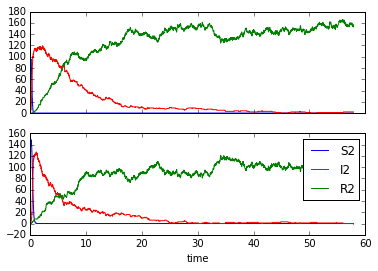

In [13]:
Gillespie_SIR(100,150,0.15,0.07,0.08,0.2,0.3,1000)